# Breast Cancer Wisconsin (Diagnostic) Data Set - TensorFlow Classification - Kaggle

## Reading in the data

I will be making use of the data found in the following Kaggle dataset: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

Importing the libraries that I will be making use of:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Since I am using Jupyter Notebook and I would like to see plots displayed directly below the code cells that produce them, I must use the following:

In [3]:
%matplotlib inline

In [4]:
df = pd.read_csv('bc_wisconsin.csv')

In [5]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

This dataset contains 569 unique data points of tumours as well as their features. Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

I will be using TensorFlow to build a model that will attempt to predict whether the tumour is benign or malignant. I will then compare these to the actual classification of the tumour which is included (column name 'benign_0__mal_1').

# Exploratory data analysis

### This section is just to explore the data and gain some preliminary insight. You can skip to the model training section if you don't want to view this.


What is the count of benign vs malignant tumours?

<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

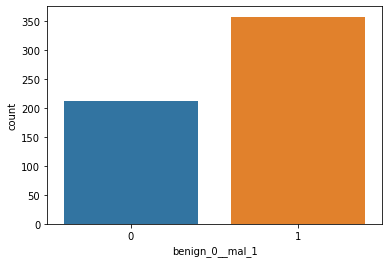

In [7]:
sns.countplot(x='benign_0__mal_1',data=df)

There are more malignant tumours than benign (1 indicates malignant)

Taking a look at correlation between the 'benign_0__mal_1' column and the other colums:

In [9]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

There appear to be a lot of features that are highly negatively correlated with this column. Showing this in bar chart form:

<AxesSubplot:>

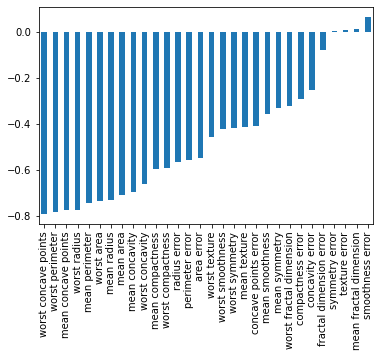

In [10]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

## Building the model

### Train Test Split

I want to split my data into a training set to train the model and a test set to test the model:

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

Since we only have 569 data points, I will use 80% of the data for training and the remaining 20% for testing.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

### Scaling the data

I will do the scaling of the data after the split so I only fit to the training set to prevent data leakage to the test set. I will use MinMaxScaler from sklearn.preprocessing to scale the data.

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler()

In [19]:
scaler.fit(X_train)

MinMaxScaler()

In [20]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Creating the model

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [23]:
X_train.shape

(455, 30)

Since the incoming data has 30 features, I think that 30 neurons are a good idea for the input layer of the model. I will use the Rectified Linear Unit (ReLU) activation function as it is easier to train and achieves good performance compared with other activation functions.

The final layer will have one neuron. This neuron will output the model's prediction for the tumour. Since this is a binary classification problem, I will chose 'binary_crossentropy' as the loss metric for this model, along with the 'Adam' optimizer.

In [24]:
model = Sequential()

model.add(Dense(units=30,activation='relu'))

model.add(Dense(units=15,activation='relu'))


model.add(Dense(units=1,activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam')

I will use the test data as validation data so that I can see how well the model is performing on the test data after each epoch. (One epoch means that each sample in the training dataset has had an opportunity to update the internal model parameters.)

In [25]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=400,
          validation_data=(X_test, y_test), verbose=1
          )

Epoch 1/400
15/15 [==============================] - 2s 11ms/step - loss: 0.6791 - val_loss: 0.6636
Epoch 2/400
15/15 [==============================] - 0s 4ms/step - loss: 0.6577 - val_loss: 0.6412
Epoch 3/400
15/15 [==============================] - 0s 4ms/step - loss: 0.6372 - val_loss: 0.6181
Epoch 4/400
15/15 [==============================] - 0s 4ms/step - loss: 0.6149 - val_loss: 0.5926
Epoch 5/400
15/15 [==============================] - 0s 4ms/step - loss: 0.5902 - val_loss: 0.5645
Epoch 6/400
15/15 [==============================] - 0s 4ms/step - loss: 0.5582 - val_loss: 0.5262
Epoch 7/400
15/15 [==============================] - 0s 4ms/step - loss: 0.5204 - val_loss: 0.4863
Epoch 8/400
15/15 [==============================] - 0s 4ms/step - loss: 0.4796 - val_loss: 0.4398
Epoch 9/400
15/15 [==============================] - 0s 4ms/step - loss: 0.4329 - val_loss: 0.3850
Epoch 10/400
15/15 [==============================] - 0s 4ms/step - loss: 0.3782 - val_loss: 0.3339
Epoch 11

15/15 [==============================] - 0s 4ms/step - loss: 0.0451 - val_loss: 0.0779
Epoch 84/400
15/15 [==============================] - 0s 4ms/step - loss: 0.0448 - val_loss: 0.0828
Epoch 85/400
15/15 [==============================] - 0s 4ms/step - loss: 0.0456 - val_loss: 0.0809
Epoch 86/400
15/15 [==============================] - 0s 4ms/step - loss: 0.0454 - val_loss: 0.0814
Epoch 87/400
15/15 [==============================] - 0s 4ms/step - loss: 0.0444 - val_loss: 0.0833
Epoch 88/400
15/15 [==============================] - 0s 4ms/step - loss: 0.0450 - val_loss: 0.0842
Epoch 89/400
15/15 [==============================] - 0s 4ms/step - loss: 0.0444 - val_loss: 0.0832
Epoch 90/400
15/15 [==============================] - 0s 4ms/step - loss: 0.0489 - val_loss: 0.0770
Epoch 91/400
15/15 [==============================] - 0s 4ms/step - loss: 0.0439 - val_loss: 0.0808
Epoch 92/400
15/15 [==============================] - 0s 4ms/step - loss: 0.0423 - val_loss: 0.0821
Epoch 93/400


15/15 [==============================] - 0s 4ms/step - loss: 0.0260 - val_loss: 0.1192
Epoch 165/400
15/15 [==============================] - 0s 4ms/step - loss: 0.0258 - val_loss: 0.1316
Epoch 166/400
15/15 [==============================] - 0s 4ms/step - loss: 0.0272 - val_loss: 0.1139
Epoch 167/400
15/15 [==============================] - 0s 4ms/step - loss: 0.0275 - val_loss: 0.1418
Epoch 168/400
15/15 [==============================] - 0s 4ms/step - loss: 0.0260 - val_loss: 0.1246
Epoch 169/400
15/15 [==============================] - 0s 4ms/step - loss: 0.0261 - val_loss: 0.1214
Epoch 170/400
15/15 [==============================] - 0s 4ms/step - loss: 0.0298 - val_loss: 0.1291
Epoch 171/400
15/15 [==============================] - 0s 4ms/step - loss: 0.0261 - val_loss: 0.1160
Epoch 172/400
15/15 [==============================] - 0s 4ms/step - loss: 0.0258 - val_loss: 0.1352
Epoch 173/400
15/15 [==============================] - 0s 4ms/step - loss: 0.0246 - val_loss: 0.1135
Epoc

15/15 [==============================] - 0s 4ms/step - loss: 0.0163 - val_loss: 0.1846
Epoch 246/400
15/15 [==============================] - 0s 4ms/step - loss: 0.0155 - val_loss: 0.1776
Epoch 247/400
15/15 [==============================] - 0s 4ms/step - loss: 0.0140 - val_loss: 0.2076
Epoch 248/400
15/15 [==============================] - 0s 4ms/step - loss: 0.0152 - val_loss: 0.1746
Epoch 249/400
15/15 [==============================] - 0s 4ms/step - loss: 0.0140 - val_loss: 0.1954
Epoch 250/400
15/15 [==============================] - 0s 4ms/step - loss: 0.0140 - val_loss: 0.1875
Epoch 251/400
15/15 [==============================] - 0s 4ms/step - loss: 0.0143 - val_loss: 0.1810
Epoch 252/400
15/15 [==============================] - 0s 4ms/step - loss: 0.0148 - val_loss: 0.2057
Epoch 253/400
15/15 [==============================] - 0s 4ms/step - loss: 0.0148 - val_loss: 0.1883
Epoch 254/400
15/15 [==============================] - 0s 4ms/step - loss: 0.0136 - val_loss: 0.1984
Epoc

15/15 [==============================] - 0s 4ms/step - loss: 0.0121 - val_loss: 0.2660
Epoch 327/400
15/15 [==============================] - 0s 4ms/step - loss: 0.0081 - val_loss: 0.2394
Epoch 328/400
15/15 [==============================] - 0s 4ms/step - loss: 0.0078 - val_loss: 0.2538
Epoch 329/400
15/15 [==============================] - 0s 4ms/step - loss: 0.0082 - val_loss: 0.2449
Epoch 330/400
15/15 [==============================] - 0s 4ms/step - loss: 0.0092 - val_loss: 0.2295
Epoch 331/400
15/15 [==============================] - 0s 4ms/step - loss: 0.0093 - val_loss: 0.2809
Epoch 332/400
15/15 [==============================] - 0s 4ms/step - loss: 0.0096 - val_loss: 0.2551
Epoch 333/400
15/15 [==============================] - 0s 4ms/step - loss: 0.0143 - val_loss: 0.2318
Epoch 334/400
15/15 [==============================] - 0s 4ms/step - loss: 0.0110 - val_loss: 0.2660
Epoch 335/400
15/15 [==============================] - 0s 4ms/step - loss: 0.0080 - val_loss: 0.2532
Epoc

I will look at the history of the model's loss and validation loss. Plotting this shows:

<AxesSubplot:>

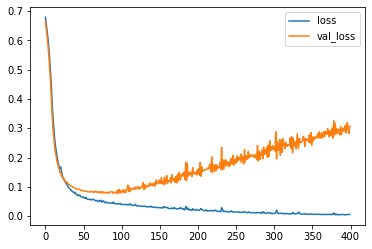

In [26]:
pd.DataFrame(model.history.history).plot()

The upward slope of the val_loss shows that overfitting occurred. It looks to be beneficial to add in an early stopping callback to stop training once val_loss begins to increase too much.

## Early stopping

In [27]:
from tensorflow.keras.callbacks import EarlyStopping

In [28]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

The above early stopping callback will stop training when val_loss has stopped decreasing. After 25 epochs with no improvement, training will cease.

In [29]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [30]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=400,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/400
15/15 [==============================] - 0s 9ms/step - loss: 0.6733 - val_loss: 0.6446
Epoch 2/400
15/15 [==============================] - 0s 4ms/step - loss: 0.6244 - val_loss: 0.5928
Epoch 3/400
15/15 [==============================] - 0s 4ms/step - loss: 0.5722 - val_loss: 0.5358
Epoch 4/400
15/15 [==============================] - 0s 3ms/step - loss: 0.5209 - val_loss: 0.4821
Epoch 5/400
15/15 [==============================] - 0s 4ms/step - loss: 0.4675 - val_loss: 0.4298
Epoch 6/400
15/15 [==============================] - 0s 4ms/step - loss: 0.4154 - val_loss: 0.3744
Epoch 7/400
15/15 [==============================] - 0s 4ms/step - loss: 0.3658 - val_loss: 0.3317
Epoch 8/400
15/15 [==============================] - 0s 4ms/step - loss: 0.3315 - val_loss: 0.2966
Epoch 9/400
15/15 [==============================] - 0s 4ms/step - loss: 0.2929 - val_loss: 0.2646
Epoch 10/400
15/15 [==============================] - 0s 4ms/step - loss: 0.2645 - val_loss: 0.2434
Epoch 11/

15/15 [==============================] - 0s 4ms/step - loss: 0.0452 - val_loss: 0.0988
Epoch 84/400
15/15 [==============================] - 0s 4ms/step - loss: 0.0476 - val_loss: 0.1010
Epoch 85/400
15/15 [==============================] - 0s 4ms/step - loss: 0.0501 - val_loss: 0.0959
Epoch 86/400
15/15 [==============================] - 0s 4ms/step - loss: 0.0464 - val_loss: 0.1063
Epoch 87/400
15/15 [==============================] - 0s 4ms/step - loss: 0.0458 - val_loss: 0.0971
Epoch 88/400
15/15 [==============================] - 0s 4ms/step - loss: 0.0459 - val_loss: 0.1042
Epoch 00088: early stopping


<AxesSubplot:>

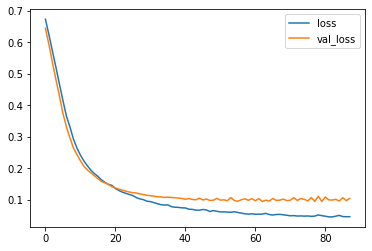

In [31]:
pd.DataFrame(model.history.history).plot()

This is the kind of plot that I want to see. Training stops before validation loss begins to increase. We can further improve the model by using dropout layers:

### Dropout layers

In [32]:
from tensorflow.keras.layers import Dropout

I will train the model with a dropout rate of 0.5. This means that 50% of inputs will randomly be set to 0. This will help to prevent overfitting. I will also continue to use the early stopping callback.

In [37]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [38]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=400,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/400
15/15 [==============================] - 0s 9ms/step - loss: 0.6783 - val_loss: 0.6513
Epoch 2/400
15/15 [==============================] - 0s 4ms/step - loss: 0.6621 - val_loss: 0.6366
Epoch 3/400
15/15 [==============================] - 0s 4ms/step - loss: 0.6552 - val_loss: 0.6204
Epoch 4/400
15/15 [==============================] - 0s 4ms/step - loss: 0.6407 - val_loss: 0.6068
Epoch 5/400
15/15 [==============================] - 0s 4ms/step - loss: 0.6176 - val_loss: 0.5896
Epoch 6/400
15/15 [==============================] - 0s 4ms/step - loss: 0.6029 - val_loss: 0.5673
Epoch 7/400
15/15 [==============================] - 0s 4ms/step - loss: 0.5924 - val_loss: 0.5446
Epoch 8/400
15/15 [==============================] - 0s 4ms/step - loss: 0.5782 - val_loss: 0.5210
Epoch 9/400
15/15 [==============================] - 0s 4ms/step - loss: 0.5541 - val_loss: 0.4935
Epoch 10/400
15/15 [==============================] - 0s 4ms/step - loss: 0.5172 - val_loss: 0.4596
Epoch 11/

15/15 [==============================] - 0s 4ms/step - loss: 0.1088 - val_loss: 0.1112
Epoch 84/400
15/15 [==============================] - 0s 5ms/step - loss: 0.1117 - val_loss: 0.1118
Epoch 85/400
15/15 [==============================] - 0s 5ms/step - loss: 0.1167 - val_loss: 0.1231
Epoch 86/400
15/15 [==============================] - 0s 5ms/step - loss: 0.1323 - val_loss: 0.1195
Epoch 87/400
15/15 [==============================] - 0s 4ms/step - loss: 0.1022 - val_loss: 0.1164
Epoch 88/400
15/15 [==============================] - 0s 4ms/step - loss: 0.1123 - val_loss: 0.1091
Epoch 89/400
15/15 [==============================] - 0s 4ms/step - loss: 0.1057 - val_loss: 0.1246
Epoch 90/400
15/15 [==============================] - 0s 4ms/step - loss: 0.1059 - val_loss: 0.1125
Epoch 91/400
15/15 [==============================] - 0s 4ms/step - loss: 0.0968 - val_loss: 0.1103
Epoch 92/400
15/15 [==============================] - 0s 4ms/step - loss: 0.1013 - val_loss: 0.1143
Epoch 93/400


<AxesSubplot:>

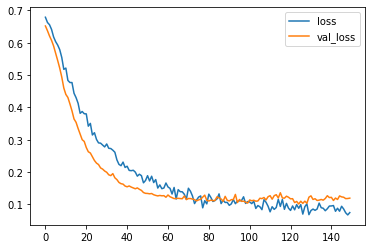

In [39]:
pd.DataFrame(model.history.history).plot()

The above plot shows even better behaviour. The training loss and validation loss are both quickly decreasing and flattening out over time.

## Model Evaluation

I will predict classes for my test set.

In [40]:
predictions = model.predict_classes(X_test)

C:\Users\Pritesh\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [41]:
from sklearn.metrics import classification_report,confusion_matrix

In [42]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        42
           1       0.95      1.00      0.97        72

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



In [43]:
print(confusion_matrix(y_test,predictions))

[[38  4]
 [ 0 72]]


This model is giving very good perfomance. There is a 96% accuracy and the model only incorrectly identified 4 data points in the test set. These 4 data points were false positives and our model did not produce any false negatives which is important when it comes to identifying dangerous tumours.